In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from PIL import Image
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

import os

In [ ]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a fourth convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu')) # layer of exact similar nature as that of previous. Number of filters(128) to be optimized against accuracy
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
# output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True) # data augmented on training dataset 

validation_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Fabric Defect Detection_/train', # training dataset path
                                                 target_size = (64, 64), # input shape of image is 64*64
                                                 batch_size = 10, 
                                                 class_mode = 'binary') # binary vs categorical vs none(we have binary classificaton)

validation_set = validation_datagen.flow_from_directory('/content/drive/MyDrive/Fabric Defect Detection_/val', # validation dataset path
                                            target_size = (64, 64),
                                            batch_size = 10,
                                            class_mode = 'binary')

Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
history = classifier.fit_generator(training_set,
                         epochs =20 ,
                         steps_per_epoch = 24, # images in training dataset divided by batch size
                         validation_data = validation_set,
                         validation_steps = 6) # images in validation dataset divided by batch size
print(history.history.keys())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
24/24 [==============================] - 145s 6s/step - loss: 0.6938 - accuracy: 0.5417 - val_loss: 0.7010 - val_accuracy: 0.5000
Epoch 2/20
24/24 [==============================] - 52s 2s/step - loss: 0.6943 - accuracy: 0.5292 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 3/20
24/24 [==============================] - 51s 2s/step - loss: 0.6940 - accuracy: 0.5000 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 4/20
24/24 [==============================] - 52s 2s/step - loss: 0.6926 - accuracy: 0.5000 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 5/20
24/24 [==============================] - 51s 2s/step - loss: 0.6926 - accuracy: 0.5625 - val_loss: 0.6891 - val_accuracy: 0.6000
Epoch 6/20
24/24 [==============================] - 52s 2s/step - loss: 0.6927 - accuracy: 0.5458 - val_loss: 0.6862 - val_accuracy: 0.5833
Epoch 7/20
24/24 [==============================] - 51s 2s/step - loss: 0.6846 - accuracy: 0.6375 - val_loss: 0.6690 - val_accuracy: 0.6333
Epoch 8/20
24/24 [=

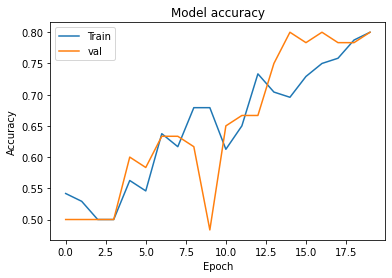

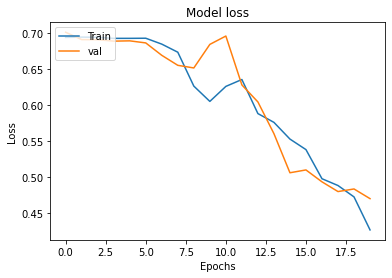

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'val'], loc='upper left')

In [ ]:
classifier.save('/content/drive/MyDrive/Fabric Defect Detection/Model.h5')

classifier.save_weights('/content/drive/MyDrive/Fabric Defect Detection/Model_weights.h5')

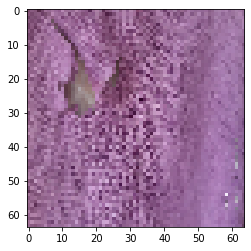

predicted image: Defective


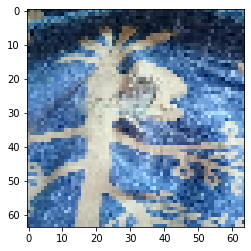

predicted image: Defective


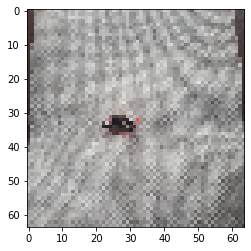

predicted image: Defective


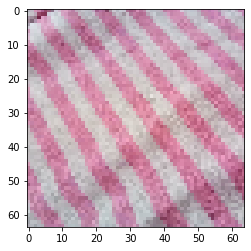

predicted image: Defectless


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
dir_path = '/content/drive/MyDrive/Fabric Defect Detection_/test'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(64,64))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images = np.vstack([X])
    
    val= classifier.predict(images)
    if val==0:
        print("predicted image: Defective")
    else:
        print("predicted image: Defectless")